<a href="https://colab.research.google.com/github/chuertas18/UD_Tesis_Quimbo/blob/main/Modelos_machine_learning_CH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar datos y evaluarlos

In [2]:
# Cargamos los datos
df = pd.read_csv('GEDI_CH_raster_values.csv')
df.head()

,CH,S2_B2,S2_B3,S2_B4,S2_B5,S2_B6,S2_B7,S2_B8,S2_B8A,S2_B11,S2_B12,elevacion
0,10.0,541.5000,807.8750,547.625,1251.5000,2688.1250,3104.5625,3124.7500,3326.7500,2060.7500,1104.5625,846.0
1,4.0,487.0625,765.6250,493.875,1226.4375,2781.9375,3226.4375,3253.8125,3524.3750,2100.0625,1101.7500,848.0
2,19.0,432.9375,739.8125,558.375,1264.0000,2683.6875,3080.6250,3084.3125,3356.5625,2312.6875,1222.6250,895.0
3,7.0,584.6875,791.8750,611.125,1165.1875,2177.5000,2477.0000,2559.3750,2719.8125,2273.6875,1287.8750,845.0
4,3.0,712.3750,972.5625,847.250,1453.0625,2797.7500,3205.8125,3237.9375,3527.3750,2835.6875,1738.1875,479.0


In [3]:
# Histograma de CH
# Filtramos los datos para incluir solo los valores mayores o iguales a cero
df_filtered = df[df['CH'] >= 0]

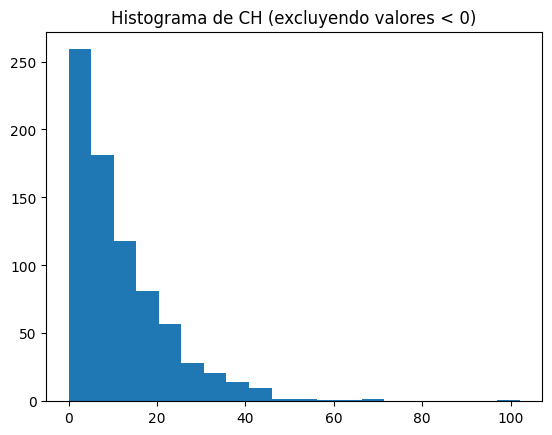

In [4]:
# Histograma de CH con valores mayores o iguales a cero
plt.hist(df_filtered['CH'], bins=20)
plt.title('Histograma de CH (excluyendo valores < 0)')
plt.show()

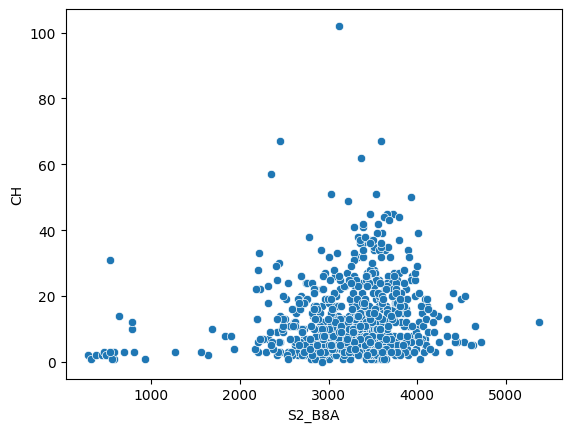

In [5]:
# Plot de S2_B8A vs CH
sns.scatterplot(x='S2_B8A', y='CH', data=df_filtered)
plt.show()

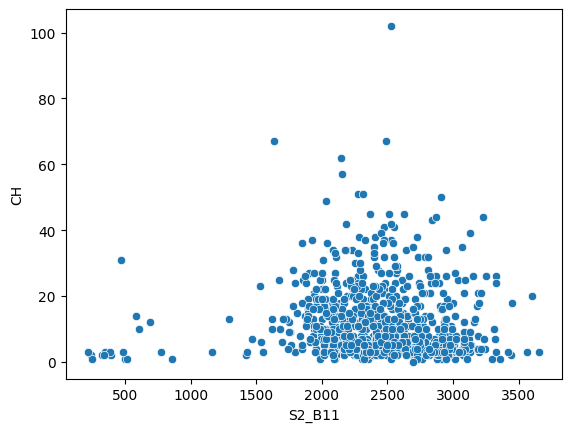

In [6]:
# Plot de S2_B11 vs CH
sns.scatterplot(x='S2_B11', y='CH', data=df_filtered)
plt.show()

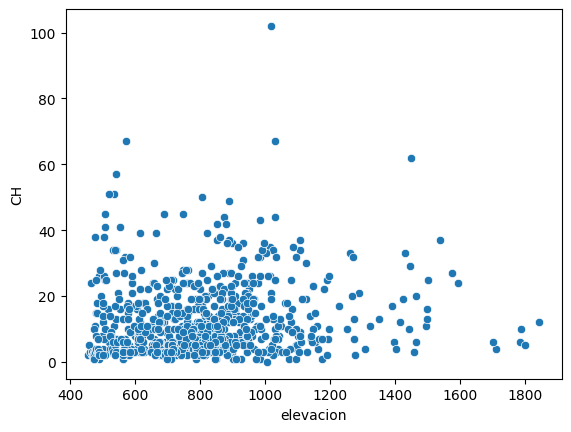

In [7]:
# Plot de S2_B11 vs CH
sns.scatterplot(x='elevacion', y='CH', data=df_filtered)
plt.show()

# Establecer los valores de evaluación y entrenamiento

In [8]:
# Separamos en train y test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# # Creamos y entrenamos los modelos

In [9]:
# Modelo 1: Linear regression multivariable
model_1 = LinearRegression()
model_1.fit(train_df.drop('CH', axis=1).values, train_df['CH'].values)

LinearRegression()

In [10]:
# Modelo 2: Decision Tree
model_2 = DecisionTreeRegressor()
model_2.fit(train_df.drop('CH', axis=1).values, train_df['CH'].values)

DecisionTreeRegressor()

In [11]:
# Modelo 3: Random Forest
model_3 = RandomForestRegressor()
model_3.fit(train_df.drop('CH', axis=1).values, train_df['CH'].values)

RandomForestRegressor()

In [12]:
# Modelo 4: Perceptron
model_4 = Perceptron()
model_4.fit(train_df.drop('CH', axis=1).values, train_df['CH'].values)

Perceptron()

In [13]:
# Creamos una función para evaluar los modelos
def eval_model(model, X, y):
    pred = model.predict(X)
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    r2 = r2_score(y, pred)
    return mse, mae, r2

In [14]:
# Evaluamos los modelos en los datos de test
for i, model in enumerate([model_1, model_2, model_3, model_4], start=1):
    mse, mae, r2 = eval_model(model, test_df.drop('CH', axis=1).values, test_df['CH'].values)
    print(f'Modelo {i} - MSE: {mse}, MAE: {mae}, R2: {r2}')

Modelo 1 - MSE: 513080.6163675717, MAE: 279.24696374222975, R2: 0.18610098534365427
Modelo 2 - MSE: 634219.8291139241, MAE: 72.27215189873418, R2: -0.006061966725203316
Modelo 3 - MSE: 184329.08904746838, MAE: 129.59639240506328, R2: 0.7075990416274895
Modelo 4 - MSE: 1266608.9556962026, MAE: 134.22151898734177, R2: -1.0092198927614717


# Modelo final e hyperparametrización

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
# Definimos los parámetros que queremos probar
param_grid = {
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [17]:
# Creamos el modelo base
dt = DecisionTreeRegressor()

In [18]:
# Instanciamos el grid search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [19]:
# Ajustamos el grid search a los datos
grid_search.fit(train_df.drop('CH', axis=1).values, train_df['CH'].values)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [20]:
# Imprimimos los mejores parámetros
print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [21]:
mf = DecisionTreeRegressor(max_depth= 40,min_samples_leaf=4, min_samples_split=10)
mf.fit(train_df.drop('CH', axis=1).values, train_df['CH'].values)

DecisionTreeRegressor(max_depth=40, min_samples_leaf=4, min_samples_split=10)

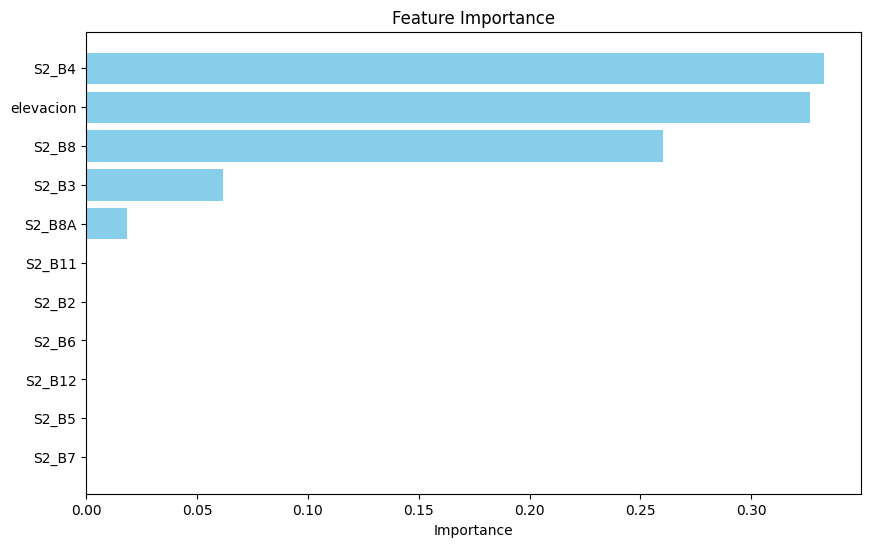

In [22]:
# Obtenemos la importancia de las características
feature_importances = mf.feature_importances_

# Creamos una lista con los nombres de las características
features = train_df.drop('CH', axis=1).columns

# Creamos un DataFrame para facilitar la visualización
importances_df = pd.DataFrame({'feature': features, 'importance': feature_importances})

# Ordenamos el DataFrame en base a la importancia
importances_df = importances_df.sort_values(by='importance', ascending=True)

# Creamos el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
plt.barh(importances_df['feature'], importances_df['importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Predecir nuevos datos

In [ ]:
!pip install  rasterio

In [24]:
import rasterio
from rasterio import *
from rasterio.plot import show
import matplotlib.pyplot as plt

In [25]:
# Predecir a nivel de paisaje
# Cargar los datos de la imagen compuesta raster
raster_path = '/content/Imagen_compuesta_MLCH.tif'
raster = rasterio.open(raster_path)

In [26]:
# Extraer las bandas correspondientes a las características que se utilizaron para entrenar el modelo
bands = ['S2_B2', 'S2_B3', 'S2_B4', 'S2_B5', 'S2_B6', 'S2_B7', 'S2_B8', 'S2_B8A', 'S2_B11', 'S2_B12','elevacion']
data = []
for i, band in enumerate(bands):
    data.append(raster.read(i + 1))

In [27]:
# Apilar las bandas en una matriz 2D
data = np.stack(data, axis=-1)
data = np.reshape(data, (-1, len(bands)))

In [28]:
# Comprobación de valores nulos
has_nans = np.isnan(data).any()

if has_nans:
    print("La matriz data contiene valores nulos")
else:
    print("La matriz data no contiene valores nulos")

La matriz data no contiene valores nulos


In [29]:
result = mf.predict(data)
#result = stack.predict(estimator=rf)

In [30]:
# Guardar mean predicciones en una nueva banda de la imagen raster
profile = raster.profile
profile.update(dtype=rasterio.float32, count=1)
with rasterio.open('/content/Prediccion_MLCH.tif', 'w', **profile) as dst:
    dst.write( result.reshape((raster.height, raster.width)), 1)

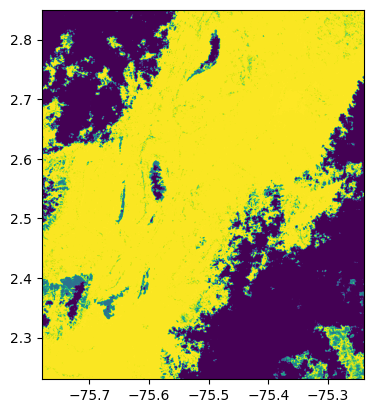

In [31]:
# Visualizar el mapa
# Cargamos el archivo raster
src = rasterio.open('/content/Prediccion_MLCH.tif')

# Creamos una figura y un eje con matplotlib
fig, ax = plt.subplots()

# Utilizamos la función show de rasterio para visualizar el raster
show(src, ax=ax)

# Mostramos la figura con matplotlib
plt.show()
